# Chapter1. 프로그래밍 언어와 Python

## 11. 라이브러리를 활용한 머신러닝 예제

- 앞서 학습한 심화 라이브러리 내용을 활용하여 더욱 더 심화된 내용의 머신 러닝 이론을 학습하고 실제 모델을 구현해 본다.


<b>머신 러닝(Machine Learning)이란?</b>

- 인공지능의 한 분야로서, 스스로 학습하는 기계를 의미하며 컴퓨터의 학습을 통해 알고리즘 및 기술을 개발하는 분야를 말한다.
- 사기 방지, 타겟팅 디지털 디스플레이, 콘텐츠 추천, 자동차 품질 개선, 미디어 최적화, 의료 보건 서비스 개선 등 다양한 분야에서 적용되어 사용 중이다.

<div style="border : 1px solid #f2f2f2; padding : 5px; text-align : center;">
<figure>
<img src=https://user-images.githubusercontent.com/43736669/75436555-1aef1a80-5998-11ea-8c7f-1e974474a980.png  style="">
    <center><figcaption>&#60;그림 1&#62; 머신러닝 사례 - 검색어 자동완성(좌), 소셜미디어 친구 추천(우)
        </figcaption></center>
</figure></div>

- 앞으로 학습할 머신 러닝 모델 및 활용 사례는 크게 네 가지로, 1)Softmax Classifier를 활용한 손글씨 이미지 분류. 2)CNN 모델을 활용한 동물 이미지 분류, 3)GAN을 활용한 손글씨 이미지 생성, 4)RNN을 활용한 언어 모델 학습이다.


### 11.1 손글씨 이미지 분류

<b>MNIST 데이터셋</b>
<div style="border : 1px solid #f2f2f2; padding : 5px; text-align : center;">
<figure>
<img src=https://user-images.githubusercontent.com/43736669/75436915-b1bbd700-5998-11ea-8348-89fffcaaaf1b.png  style="">
    <center><figcaption>&#60;그림 2&#62; MNIST 데이터셋
        </figcaption></center>
</figure></div>

- 손으로 쓴 숫자들로 이루어진 대형 데이터베이스이다.
- (28 x 28) 크기의 그레이스케일 데이터이다.
- 60000개의 학습용 이미지와 10000개의 테스트용 이미지를 포함한다.

<b>MNIST 데이터셋 불러오기</b><br>
- MNIST 데이터셋을 외부 서버로부터 불러온다

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

<b>MNIST 데아터셋 확인</b><br>
- 불러온 MNIST 데이터셋을 시각적으로 확인한다.

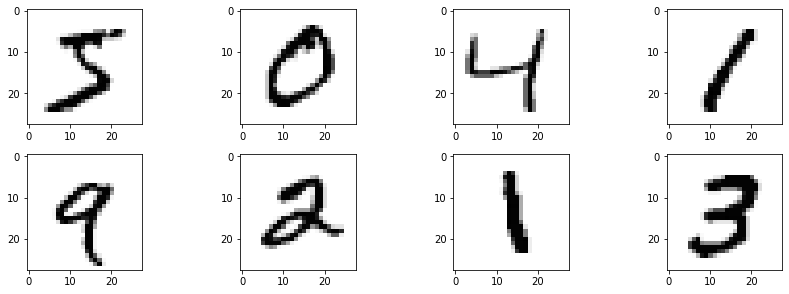

In [7]:
from matplotlib import pyplot as plt
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

#0~7번까지의 8개 데이터 확인
for n in range(0,8):
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(train_images[n], cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

<b>Softmax Classifier 설계</b>

- Cost Function으로 Cross-Entropy를 사용하여 학습을 실시한다.
- 출력층은 Sigmoid 함수를 사용한다.
- 경사 하강법(Gradient Descent) 방법을 심화시킨 RMSProp방법을 이용해 모델을 학습한다.
- Input Data에 대해 10개의 클래스에 속할 확률을 모두 구하여 반환한다.
<div style="border : 1px solid #f2f2f2; padding : 5px; text-align : center;">
<figure>
<img src=https://user-images.githubusercontent.com/43736669/75438070-abc6f580-599a-11ea-8a98-1b124c7345d2.png style="">
    <center><figcaption>&#60;그림 3&#62; Softmax Classifier
        </figcaption></center>
</figure></div>

- 위 그림 3과 같이 주어진 손글씨 데이터에 대해 해당 손글씨가 0~9일 확률을 모두 계산하여 가장 확률이 높은 클래스를 반환한다.


<b>경사 하강법</b>

- 미분 수치(경사)에 따라 값을 조절하며 최적의 수치를 찾아내는 방법이다.
- Gradient(경사)가 +라면 경사에 비례해 w를 감소시키고, -라면 경사에   비례해 w를 증가시켜가며 Cost를 최소로 하는 w를 찾는다.

<div style="border : 1px solid #f2f2f2; padding : 5px; text-align : center;">
<figure>
<img src=https://user-images.githubusercontent.com/43736669/75438262-fcd6e980-599a-11ea-8e0a-07fdcee324fc.png style="">
    <center><figcaption>&#60;그림 4&#62; 경사 하강법
        </figcaption></center>
</figure></div>

<b>Sigmoid 함수</b>

- Sigmoid 함수는 결과값이 항상 0과 1사이의 값을 가지는 아래와 같은 함수이다.

<div style="border : 1px solid #f2f2f2; padding : 5px; text-align : center;">
<figure>
<img src=https://user-images.githubusercontent.com/43736669/75438353-22fc8980-599b-11ea-805e-be67671fa778.png style="">
    <center><figcaption>&#60;그림 5&#62; Sigmoid 함수
        </figcaption></center>
</figure></div>

- 항상 0과 1사이의 값을 가지므로, 확률 계산에 적합하다.

<b>이미지 분류기 구현</b><br>
- 이전 단원에서 학습한 Cross-Entropy와 위에서 학습한 경사 하강법의 심화, Sigmoid 함수를 이용하여 실제 손글씨 데이터를 학습하는 모델을 텐서플로우를 이용해 구현해 본다.
- 구현은 데이터 전처리, 구조 설계, 모델 학습, 모델 검증 순으로 이루어진다.  

<b>구조 설계</b><br>
- 아래와 같이 모델을 선언하고, softmax, cross-entropy 손실함수 및 RMSprop방식을 이용한 학습을 설계한다.

In [11]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop', loss     ='categorical_crossentropy',metrics=['accuracy'])

 - 먼저, 각 이미지들을 모델에 들어갈 수 있는 모양으로 맞춰준다.
 - 512개의 w를 학습하며, 10개의 출력 값을 가지게 된다. 또한 학습 과정 중 정확도를 살펴볼 수 있게 된다.

<b>모델 학습</b><br>
- 설정한 모델을 토대로 학습을 진행한다.
- 전체 데이터를 5번 학습하며, 학습은 한번에 128개의 데이터씩을 진행한다.
- 학습을 진행하며 변화하는 loss와 정확도를 확인한다.

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2566 - accuracy: 0.9252
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1027 - accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0676 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0373 - accuracy: 0.9885


- 학습을 진행함에 따라 loss 값이 점차 줄어들고 정확도가 90%에 가깝게 향상되는 것을 볼 수 있다.
- 하지만 해당 정확도는 학습에 사용한 데이터를 토대로 한 정확도이기에 테스트용 데이터를 활용해 다시 한번 정확도를 검증할 필요가 있다.

<b>모델 정확도 검증</b><br>
- 학습에 사용되지 않은 테스트용 10000개의 데이터를 이용해 모델의 정확도를 검증해 보자. 

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.06308289723864291 0.9804


- 새로운 데이터를 기반으로 정확도를 확인하였을 때, 약 91%의 정확도로 모델이 제대로 학습되었음을 알 수 있다.

<b>모델 테스트</b><br>
- 이제 모델이 임의의 손글씨에 대해 제대로 예측을 하는지 확인해보자.

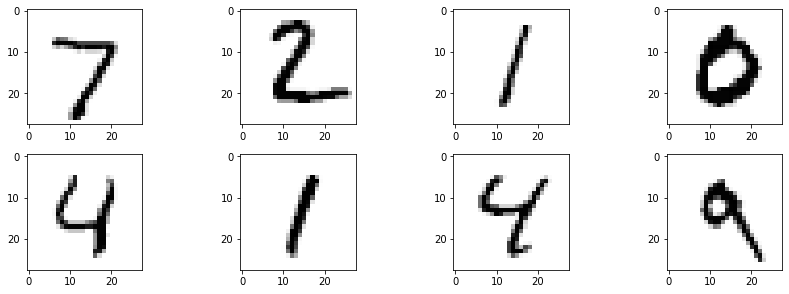

In [14]:
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

#테스트용 이미지의 0번~7번 이미지 확인
for n in range(0,8):
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28,28), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [17]:
for n in range(0,8):
    #0번~7번 이미지에 대한 예측을 진행
    print(np.argmax(model.predict(test_images[n:n+1])),end=' ')

7 2 1 0 4 1 4 9 

- 모델이 손글씨 데이터를 정확하게 예측하고 있는 것을 확인할 수 있다. 
